In [24]:
# see functional prototype at https://foothill.edu/astronomy/astrosims/darkmatter/Dark_Matter_Simulation.xhtml

In [25]:

# displays static in notebook
%matplotlib inline  
# displays interactive outside notebook
#%matplotlib   
# displays interactive in notebook
#%matplotlib notebook  


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.coordinates as coord
import astropy.units as u

#from astropy import units as u
from astropy.coordinates import SkyCoord

folder = ''

mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14

In [26]:
# useful constants
light_year = 9.46E15 # light-year in meters
Msun = 1.989E30  # mass of the sun in kg
G = 6.67408E-11 # gravitational constant in m3 kg-1 s-2
seconds_in_year = 3.154e7


In [36]:
# bin edges for dark matter density function, distances in thousands of light-years
DM_radii = np.arange(10,101,10)
DM_bin_width = 10.0

# density within each bin, kg / m3
DM_density = np.array([0.8, 0.7, 0.5, 0.2, 0.1, 0.08, 0.06, 0.04, 0.02, 0.01]) * 1E-20

# mass within each radius
DM_mass_within_shell = np.array([4.0/3 * np.pi * (1E3 * light_year * DM_radii[0])**3 * DM_density[0]])
for i in np.arange(1,len(DM_radii)):
    #calculate volume of shell
    volume = 4.0/3 * np.pi * (1E3 * light_year)**3 * (DM_radii[i]**3 - DM_radii[i-1]**3) 
    mass = volume * DM_density[i]
    DM_mass_within_shell = np.append(DM_mass_within_shell,mass)
    
print(DM_mass_within_shell)
# calculate the cumulative mass at each radius
DM_cumulative_mass = np.array([DM_mass_within_shell[0]])
for i in np.arange(1,len(DM_mass_within_shell)):
    DM_cumulative_mass = np.append(DM_cumulative_mass,DM_cumulative_mass[i-1]+DM_mass_within_shell[i])
   
# calculate circular orbit speed at each radius
# v^2/r = GM/r2
speed = (G * DM_cumulative_mass / (DM_radii * 1E3 * light_year))**0.5

# print out values
print(len(DM_cumulative_mass), len(DM_radii), len(speed))

print('radii (kly)', 'density kg/m3', 'mass within shell (Msun)', 'circular orbit speed (km/s)')
for i in np.arange(len(DM_mass_within_shell)):
    print(DM_radii[i], DM_density[i], DM_mass_within_shell[i]/Msun, DM_cumulative_mass[i]/Msun, speed[i] / 1E3)
    

[2.83695212e+40 1.73763317e+41 3.36888064e+41 2.62418071e+41
 2.16317599e+41 2.58162643e+41 2.70219689e+41 2.39722454e+41
 1.53904652e+41 9.61017529e+40]
10 10 10
radii (kly) density kg/m3 mass within shell (Msun) circular orbit speed (km/s)
10 8e-21 14263208223.877968 14263208223.877968 141.47383899889547
20 6.999999999999999e-21 87362150371.25256 101625358595.13054 267.02601534095277
30 5e-21 169375597658.55087 271000956253.68143 356.0346871212704
40 2e-21 131934676070.87122 402935632324.5527 375.9718843114013
50 1e-21 108756962707.06953 511692595031.62213 378.9545198223499
60 7.999999999999999e-22 129795194837.28954 641487789868.9117 387.3344268352643
70 6e-22 135857058332.43768 777344848201.3494 394.752936856741
80 3.9999999999999997e-22 120524109491.76884 897868957693.1182 396.8524011317568
90 1.9999999999999999e-22 77377904614.53798 975246862307.6562 389.94517732969916
100 9.999999999999999e-23 48316617858.38663 1023563480166.0428 378.9875283603527


Text(0.5,1,'Dark matter density (kg/m3)')

<Figure size 432x288 with 0 Axes>

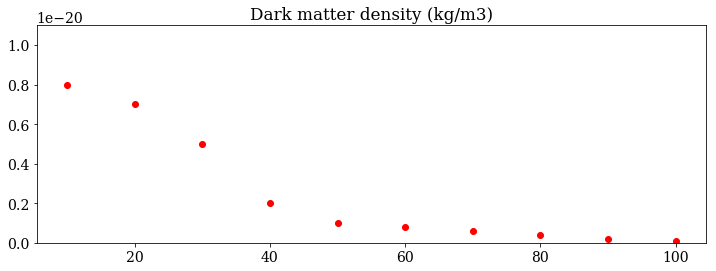

In [37]:
plt.clf()
plt.figure(figsize=(12,4))
plt.ylim(0,1.1E-20)

plt.scatter(DM_radii,DM_density, c = 'red')
plt.title('Dark matter density (kg/m3)')

Text(0.5,1,'Orbital speed (km/s)')

<Figure size 432x288 with 0 Axes>

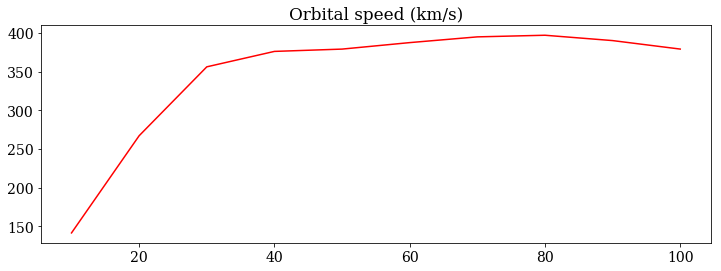

In [38]:
plt.clf()
plt.figure(figsize=(12,4))
#plt.ylim(0,1.1E-20)

plt.plot(DM_radii,speed / 1E3, c = 'red')
plt.title('Orbital speed (km/s)')